# Introduction to Pandas

**Pandas** is the most popular Python library for data manipulation and analysis. It provides powerful data structures and tools for working with structured data.

## What is Pandas?

Pandas is built on top of NumPy and provides:
- **Two main data structures**: Series (1D) and DataFrame (2D)
- **Flexible indexing**: both label-based and position-based
- **Data alignment**: automatic alignment of data in operations
- **Missing data handling**: intuitive tools for working with incomplete data
- **Data manipulation**: filtering, sorting, grouping, merging, and reshaping
- **I/O tools**: reading and writing data from various formats (CSV, Excel, JSON, etc.)

## Key Data Structures

1. **Series**: A one-dimensional labeled array (like a column in a spreadsheet)
2. **DataFrame**: A two-dimensional labeled table (like a spreadsheet or SQL table)

This notebook covers the **essential Pandas concepts** for mechanical engineering applications: analyzing sensor data, material properties, experimental results, and manufacturing processes.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/w10k57-git/python-cookbook/blob/main/notebooks/06-mpm-pandas.ipynb)

## Setup

In [346]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [347]:
# Configure display settings and data paths
np.random.seed(42)
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

# Define data directories
DATA_DIR = Path("../data/external")
TEMP_DIR = Path("../data/temp")
TEMP_DIR.mkdir(parents=True, exist_ok=True)

print(f"Data directory: {DATA_DIR}")
print(f"Output directory: {TEMP_DIR}")

Data directory: ../data/external
Output directory: ../data/temp


## 1. Series: The 1D Data Structure

A **Series** is a one-dimensional labeled array. Think of it as a single column from a spreadsheet with index labels.

### Key Features:
- Can hold any data type (int, float, string, objects)
- Has an associated index for each value
- Supports vectorized operations
- Automatically aligns data by index in operations

In [348]:
# Create a Series with default integer index
temperatures = pd.Series([22.5, 23.1, 22.8, 23.5])
print("Temperature readings (°C):") 
print(temperatures)

Temperature readings (°C):
0    22.5
1    23.1
2    22.8
3    23.5
dtype: float64


In [349]:
# Create a Series with custom string index  
temperatures = pd.Series(
    [22.5, 23.1, 22.8, 23.5],
    index=["sensor_A", "sensor_B", "sensor_C", "sensor_D"]
)
print("Named temperature sensors:")
print(temperatures)

Named temperature sensors:
sensor_A    22.5
sensor_B    23.1
sensor_C    22.8
sensor_D    23.5
dtype: float64


In [350]:
# Access by label
print(f"Sensor B temperature: {temperatures['sensor_B']} °C")

# Access multiple values
print("\nSensors A and C:")
print(temperatures[["sensor_A", "sensor_C"]])

Sensor B temperature: 23.1 °C

Sensors A and C:
sensor_A    22.5
sensor_C    22.8
dtype: float64


In [351]:
# Boolean filtering - find sensors above 23°C
hot_sensors = temperatures[temperatures > 23.0]
print("Sensors reading above 23°C:")
print(hot_sensors)

Sensors reading above 23°C:
sensor_B    23.1
sensor_D    23.5
dtype: float64


In [352]:
# Vectorized operations - convert to Kelvin
temperatures_k = temperatures + 273.15
print("Temperatures in Kelvin:")
print(temperatures_k)

Temperatures in Kelvin:
sensor_A    295.65
sensor_B    296.25
sensor_C    295.95
sensor_D    296.65
dtype: float64


In [353]:
# Create Series from dictionary (material properties)
steel_properties = {"density_kg_m3": 7850, "youngs_modulus_GPa": 210, "yield_strength_MPa": 250}
properties = pd.Series(steel_properties)
print("Steel properties:")
print(properties)

Steel properties:
density_kg_m3         7850
youngs_modulus_GPa     210
yield_strength_MPa     250
dtype: int64


In [354]:
# Missing data (NaN) - sensor readings with failures
strain_readings = pd.Series([0.0012, np.nan, 0.0015, 0.0011], 
                            index=["gauge_1", "gauge_2", "gauge_3", "gauge_4"])
print("Strain gauge readings:")
print(strain_readings)
print("\nFailed sensors:")
print(strain_readings.isna())

Strain gauge readings:
gauge_1    0.0012
gauge_2       NaN
gauge_3    0.0015
gauge_4    0.0011
dtype: float64

Failed sensors:
gauge_1    False
gauge_2     True
gauge_3    False
gauge_4    False
dtype: bool


In [355]:
# Automatic alignment in operations
baseline_strain = pd.Series([0.0010, 0.0011, 0.0012], index=["gauge_1", "gauge_3", "gauge_5"])
strain_diff = strain_readings - baseline_strain
print("Strain difference from baseline:")
print(strain_diff)  # Note: non-matching indices become NaN

Strain difference from baseline:
gauge_1    0.0002
gauge_2       NaN
gauge_3    0.0004
gauge_4       NaN
gauge_5       NaN
dtype: float64


## 2. DataFrame: The 2D Data Structure

A **DataFrame** is a two-dimensional labeled table with columns of potentially different types. Think of it as:
- A spreadsheet or database table
- A dictionary of Series (each column is a Series)

### Key Features:
- Rows and columns both have labels
- Columns can have different data types
- Size-mutable (add/remove columns)
- Most commonly used Pandas object

In [356]:
# Load DataFrame from CSV file (tensile test results)
tensile_tests = pd.read_csv(DATA_DIR / "tensile_test_results.csv")

# Show first few rows
print("Tensile test data loaded from CSV:")
print(f"Shape: {tensile_tests.shape}")
tensile_tests.head()

Tensile test data loaded from CSV:
Shape: (10, 8)


,specimen_id,material_id,test_date,ultimate_strength_MPa,yield_strength_MPa,elongation_percent,test_passed,technician
0,S001,MAT001,2024-01-10,628,532,15.8,True,Johnson
1,S002,MAT001,2024-01-10,622,528,16.2,True,Johnson
2,S003,MAT001,2024-01-11,631,535,15.5,True,Martinez
3,S004,MAT002,2024-01-11,312,278,11.9,True,Martinez
4,S005,MAT002,2024-01-11,308,274,12.3,True,Chen


In [357]:
# Inspect first and last rows
print("First 3 tests:")
print(tensile_tests.head(3))
print("\nLast 3 tests:")
print(tensile_tests.tail(3))

First 3 tests:
  specimen_id material_id   test_date  ultimate_strength_MPa  \
0        S001      MAT001  2024-01-10                    628   
1        S002      MAT001  2024-01-10                    622   
2        S003      MAT001  2024-01-11                    631   

   yield_strength_MPa  elongation_percent  test_passed technician  
0                 532                15.8         True    Johnson  
1                 528                16.2         True    Johnson  
2                 535                15.5         True   Martinez  

Last 3 tests:
  specimen_id material_id   test_date  ultimate_strength_MPa  \
7        S008      MAT003  2024-01-13                    512   
8        S009      MAT004  2024-01-13                    955   
9        S010      MAT004  2024-01-14                    948   

   yield_strength_MPa  elongation_percent  test_passed technician  
7                 220                40.2         True   Martinez  
8                 885                13.8       

In [358]:
# Check DataFrame info
print("Shape:", tensile_tests.shape)  # (rows, columns)
print("\nColumn names:")
print(tensile_tests.columns.tolist())
print("\nData types:")
print(tensile_tests.dtypes)
print("\nBasic statistics:")
print(tensile_tests[["ultimate_strength_MPa", "yield_strength_MPa", "elongation_percent"]].describe())

Shape: (10, 8)

Column names:
['specimen_id', 'material_id', 'test_date', 'ultimate_strength_MPa', 'yield_strength_MPa', 'elongation_percent', 'test_passed', 'technician']

Data types:
specimen_id               object
material_id               object
test_date                 object
ultimate_strength_MPa      int64
yield_strength_MPa         int64
elongation_percent       float64
test_passed                 bool
technician                object
dtype: object

Basic statistics:
       ultimate_strength_MPa  yield_strength_MPa  elongation_percent
count              10.000000           10.000000           10.000000
mean              572.900000          461.800000           19.170000
std               238.852558          256.220305           11.085932
min               305.000000          217.000000           11.900000
25%               361.000000          271.750000           12.675000
50%               567.000000          403.000000           14.800000
75%               630.250000       

In [359]:
# Select a column (returns a Series)
strengths = tensile_tests["ultimate_strength_MPa"]
print("Type:", type(strengths))
print("\nFirst 5 values:")
print(strengths.head())

Type: <class 'pandas.core.series.Series'>

First 5 values:
0    628
1    622
2    631
3    312
4    308
Name: ultimate_strength_MPa, dtype: int64


In [360]:
# Select multiple columns (returns a DataFrame)
subset = tensile_tests[["specimen_id", "material_id", "ultimate_strength_MPa"]]
subset.head()

,specimen_id,material_id,ultimate_strength_MPa
0,S001,MAT001,628
1,S002,MAT001,622
2,S003,MAT001,631
3,S004,MAT002,312
4,S005,MAT002,308


In [361]:
# Add a new computed column - check if strength meets spec (min 300 MPa)
tensile_tests["meets_spec"] = tensile_tests["ultimate_strength_MPa"] >= 300
tensile_tests.head()

,specimen_id,material_id,test_date,ultimate_strength_MPa,yield_strength_MPa,elongation_percent,test_passed,technician,meets_spec
0,S001,MAT001,2024-01-10,628,532,15.8,True,Johnson,True
1,S002,MAT001,2024-01-10,622,528,16.2,True,Johnson,True
2,S003,MAT001,2024-01-11,631,535,15.5,True,Martinez,True
3,S004,MAT002,2024-01-11,312,278,11.9,True,Martinez,True
4,S005,MAT002,2024-01-11,308,274,12.3,True,Chen,True


In [362]:
# Add column with calculation - strength ratio compared to S235 steel reference
# S235 is a common structural steel with 235 MPa yield strength
tensile_tests["strength_ratio_vs_S235"] = tensile_tests["yield_strength_MPa"] / 235
tensile_tests[["specimen_id", "material_id", "yield_strength_MPa", "strength_ratio_vs_S235"]].head()

,specimen_id,material_id,yield_strength_MPa,strength_ratio_vs_S235
0,S001,MAT001,532,2.263830
1,S002,MAT001,528,2.246809
2,S003,MAT001,535,2.276596
3,S004,MAT002,278,1.182979
4,S005,MAT002,274,1.165957


In [363]:
# Delete a column
tensile_tests = tensile_tests.drop(columns=["strength_ratio_vs_S235"])
# Alternative: del tensile_tests["strength_ratio_vs_S235"]
tensile_tests.head()

,specimen_id,material_id,test_date,ultimate_strength_MPa,yield_strength_MPa,elongation_percent,test_passed,technician,meets_spec
0,S001,MAT001,2024-01-10,628,532,15.8,True,Johnson,True
1,S002,MAT001,2024-01-10,622,528,16.2,True,Johnson,True
2,S003,MAT001,2024-01-11,631,535,15.5,True,Martinez,True
3,S004,MAT002,2024-01-11,312,278,11.9,True,Martinez,True
4,S005,MAT002,2024-01-11,308,274,12.3,True,Chen,True


In [364]:
# Load sensor data from CSV (demonstrates loading time-series data)
sensor_df = pd.read_csv(DATA_DIR / "sensor_readings.csv", parse_dates=["timestamp"])
print("Sensor readings loaded:")
print(f"Date range: {sensor_df['timestamp'].min()} to {sensor_df['timestamp'].max()}")
sensor_df.head()

Sensor readings loaded:
Date range: 2024-01-15 08:00:00 to 2024-01-15 12:00:00


,timestamp,sensor_id,temperature_C,pressure_kPa,humidity_percent
0,2024-01-15 08:00:00,T01,22.5,1013.2,65
1,2024-01-15 09:00:00,T01,23.1,1012.8,68
2,2024-01-15 10:00:00,T01,23.8,1012.5,70
3,2024-01-15 11:00:00,T01,24.2,1012.1,72
4,2024-01-15 12:00:00,T01,24.5,1011.8,71


## 3. Indexing and Selection

Pandas provides powerful ways to select and filter data:
- **`.loc[]`**: Label-based indexing
- **`.iloc[]`**: Position-based indexing
- **Boolean indexing**: Filter rows based on conditions

### Key Difference:
- `.loc[row_label, col_label]` uses labels
- `.iloc[row_position, col_position]` uses integer positions

In [365]:
# Load motor performance data and set meaningful index
motors = pd.read_csv(DATA_DIR / "motor_performance.csv").set_index("motor_id")
print("Motor performance data:")
motors.head()

Motor performance data:


,motor_type,power_kW,voltage_V,efficiency_percent,operating_temp_C,vibration_mm_s,runtime_hours,last_maintenance
motor_id,,,,,,,,
M001,Induction,15.2,480,92,65,2.1,1250,2023-12-15
M002,Servo,22.8,480,89,78,3.5,980,2023-11-20
M003,Induction,18.5,480,94,62,1.8,1580,2024-01-05
M004,Synchronous,20.1,480,91,70,2.4,1120,2023-12-28
M005,Induction,25.0,480,93,68,2.2,1340,2023-12-10


In [366]:
# Select single row by label with .loc
print("Motor M002 details:")
print(motors.loc["M002"])

Motor M002 details:
motor_type                 Servo
power_kW                    22.8
voltage_V                    480
efficiency_percent            89
operating_temp_C              78
vibration_mm_s               3.5
runtime_hours                980
last_maintenance      2023-11-20
Name: M002, dtype: object


In [367]:
# Select single row by position with .iloc
print("First motor:")
print(motors.iloc[0])

First motor:
motor_type             Induction
power_kW                    15.2
voltage_V                    480
efficiency_percent            92
operating_temp_C              65
vibration_mm_s               2.1
runtime_hours               1250
last_maintenance      2023-12-15
Name: M001, dtype: object


In [368]:
# Select specific rows and columns with .loc
motors.loc[["M001", "M003"], ["power_kW", "efficiency_percent", "vibration_mm_s"]]

,power_kW,efficiency_percent,vibration_mm_s
motor_id,,,
M001,15.2,92,2.1
M003,18.5,94,1.8


In [369]:
# Select by position with .iloc
motors.iloc[0:3, 0:3]  # First 3 rows, first 3 columns

,motor_type,power_kW,voltage_V
motor_id,,,
M001,Induction,15.2,480
M002,Servo,22.8,480
M003,Induction,18.5,480


In [370]:
# Boolean indexing - filter motors with high vibration
high_vibration = motors[motors["vibration_mm_s"] > 3.0]
print("Motors with vibration > 3.0 mm/s:")
print(high_vibration[["motor_type", "vibration_mm_s", "operating_temp_C"]])

Motors with vibration > 3.0 mm/s:
         motor_type  vibration_mm_s  operating_temp_C
motor_id                                             
M002          Servo             3.5                78
M006          Servo             4.1                82


In [371]:
# Multiple conditions - efficient motors with low operating temperature
efficient_cool = motors[(motors["efficiency_percent"] >= 92) & (motors["operating_temp_C"] < 70)]
print("Efficient motors with low operating temperature:")
print(efficient_cool[["motor_type", "efficiency_percent", "operating_temp_C"]])

Efficient motors with low operating temperature:
           motor_type  efficiency_percent  operating_temp_C
motor_id                                                   
M001        Induction                  92                65
M003        Induction                  94                62
M005        Induction                  93                68
M007      Synchronous                  95                59
M008        Induction                  92                66


In [372]:
# Slicing with .loc (inclusive of end)
motors.loc["M001":"M004"]

,motor_type,power_kW,voltage_V,efficiency_percent,operating_temp_C,vibration_mm_s,runtime_hours,last_maintenance
motor_id,,,,,,,,
M001,Induction,15.2,480,92,65,2.1,1250,2023-12-15
M002,Servo,22.8,480,89,78,3.5,980,2023-11-20
M003,Induction,18.5,480,94,62,1.8,1580,2024-01-05
M004,Synchronous,20.1,480,91,70,2.4,1120,2023-12-28


In [373]:
# Modifying values with .loc - update vibration after maintenance
motors_copy = motors.copy()
motors_copy.loc["M002", "vibration_mm_s"] = 1.8  # After maintenance
motors_copy.loc["M002", "last_maintenance"] = "2024-01-20"  # Update maintenance date
print("Motor M002 after maintenance:")
print(motors_copy.loc["M002", ["vibration_mm_s", "last_maintenance", "operating_temp_C"]])

Motor M002 after maintenance:
vibration_mm_s             1.8
last_maintenance    2024-01-20
operating_temp_C            78
Name: M002, dtype: object


## 4. Handling Missing Data

Real-world data often has missing values. Pandas represents missing data as `NaN` (Not a Number).

### Key Operations:
- **Detection**: `.isna()`, `.notna()`
- **Removal**: `.dropna()`
- **Filling**: `.fillna()`

In [374]:
# Create sample data with some missing values (simulating sensor failures)
sensor_data = sensor_df.copy()
# Introduce some missing values for demonstration
sensor_data.loc[1, "temperature_C"] = np.nan
sensor_data.loc[5, "humidity_percent"] = np.nan
sensor_data.loc[10, "pressure_kPa"] = np.nan

print("Sample data with missing values:")
sensor_data.head(12)

Sample data with missing values:


,timestamp,sensor_id,temperature_C,pressure_kPa,humidity_percent
0,2024-01-15 08:00:00,T01,22.5,1013.2,65.0
1,2024-01-15 09:00:00,T01,NaN,1012.8,68.0
2,2024-01-15 10:00:00,T01,23.8,1012.5,70.0
3,2024-01-15 11:00:00,T01,24.2,1012.1,72.0
4,2024-01-15 12:00:00,T01,24.5,1011.8,71.0
5,2024-01-15 08:00:00,T02,21.8,1013.5,NaN
6,2024-01-15 09:00:00,T02,22.3,1013.1,66.0
7,2024-01-15 10:00:00,T02,22.9,1012.8,68.0
8,2024-01-15 11:00:00,T02,23.4,1012.4,69.0
9,2024-01-15 12:00:00,T02,23.7,1012.0,70.0


In [375]:
# Detect missing values
print("Missing value mask:")
print(sensor_data.isna())

Missing value mask:
    timestamp  sensor_id  temperature_C  pressure_kPa  humidity_percent
0       False      False          False         False             False
1       False      False           True         False             False
2       False      False          False         False             False
3       False      False          False         False             False
4       False      False          False         False             False
5       False      False          False         False              True
6       False      False          False         False             False
7       False      False          False         False             False
8       False      False          False         False             False
9       False      False          False         False             False
10      False      False          False          True             False
11      False      False          False         False             False
12      False      False          False     

In [376]:
# Count missing values per column
print("Missing values per column:")
print(sensor_data.isna().sum())

Missing values per column:
timestamp           0
sensor_id           0
temperature_C       1
pressure_kPa        1
humidity_percent    1
dtype: int64


In [377]:
# Drop rows with ANY missing values
clean_data = sensor_data.dropna()
print("After dropping rows with NaN:")
print(clean_data)

After dropping rows with NaN:
             timestamp sensor_id  temperature_C  pressure_kPa  \
0  2024-01-15 08:00:00       T01           22.5        1013.2   
2  2024-01-15 10:00:00       T01           23.8        1012.5   
3  2024-01-15 11:00:00       T01           24.2        1012.1   
4  2024-01-15 12:00:00       T01           24.5        1011.8   
6  2024-01-15 09:00:00       T02           22.3        1013.1   
7  2024-01-15 10:00:00       T02           22.9        1012.8   
8  2024-01-15 11:00:00       T02           23.4        1012.4   
9  2024-01-15 12:00:00       T02           23.7        1012.0   
11 2024-01-15 09:00:00       T03           23.9        1012.6   
12 2024-01-15 10:00:00       T03           24.6        1012.3   
13 2024-01-15 11:00:00       T03           25.1        1011.9   
14 2024-01-15 12:00:00       T03           25.4        1011.6   

    humidity_percent  
0               65.0  
2               70.0  
3               72.0  
4               71.0  
6        

In [378]:
# Drop columns with ANY missing values
sensor_data.dropna(axis="columns")

,timestamp,sensor_id
0,2024-01-15 08:00:00,T01
1,2024-01-15 09:00:00,T01
2,2024-01-15 10:00:00,T01
3,2024-01-15 11:00:00,T01
4,2024-01-15 12:00:00,T01
5,2024-01-15 08:00:00,T02
6,2024-01-15 09:00:00,T02
7,2024-01-15 10:00:00,T02
8,2024-01-15 11:00:00,T02
9,2024-01-15 12:00:00,T02


In [379]:
# Fill missing values with a constant
filled_const = sensor_data.fillna(0)
print("Filled with 0:")
print(filled_const)

Filled with 0:
             timestamp sensor_id  temperature_C  pressure_kPa  \
0  2024-01-15 08:00:00       T01           22.5        1013.2   
1  2024-01-15 09:00:00       T01            0.0        1012.8   
2  2024-01-15 10:00:00       T01           23.8        1012.5   
3  2024-01-15 11:00:00       T01           24.2        1012.1   
4  2024-01-15 12:00:00       T01           24.5        1011.8   
5  2024-01-15 08:00:00       T02           21.8        1013.5   
6  2024-01-15 09:00:00       T02           22.3        1013.1   
7  2024-01-15 10:00:00       T02           22.9        1012.8   
8  2024-01-15 11:00:00       T02           23.4        1012.4   
9  2024-01-15 12:00:00       T02           23.7        1012.0   
10 2024-01-15 08:00:00       T03           23.2           0.0   
11 2024-01-15 09:00:00       T03           23.9        1012.6   
12 2024-01-15 10:00:00       T03           24.6        1012.3   
13 2024-01-15 11:00:00       T03           25.1        1011.9   
14 2024-01

In [380]:
# Forward fill (propagate last valid value)
filled_ffill = sensor_data.ffill()
print("Forward filled:")
print(filled_ffill)

Forward filled:
             timestamp sensor_id  temperature_C  pressure_kPa  \
0  2024-01-15 08:00:00       T01           22.5        1013.2   
1  2024-01-15 09:00:00       T01           22.5        1012.8   
2  2024-01-15 10:00:00       T01           23.8        1012.5   
3  2024-01-15 11:00:00       T01           24.2        1012.1   
4  2024-01-15 12:00:00       T01           24.5        1011.8   
5  2024-01-15 08:00:00       T02           21.8        1013.5   
6  2024-01-15 09:00:00       T02           22.3        1013.1   
7  2024-01-15 10:00:00       T02           22.9        1012.8   
8  2024-01-15 11:00:00       T02           23.4        1012.4   
9  2024-01-15 12:00:00       T02           23.7        1012.0   
10 2024-01-15 08:00:00       T03           23.2        1012.0   
11 2024-01-15 09:00:00       T03           23.9        1012.6   
12 2024-01-15 10:00:00       T03           24.6        1012.3   
13 2024-01-15 11:00:00       T03           25.1        1011.9   
14 2024-0

In [381]:
# Fill with column mean (common for numeric data)
# Select only numeric columns for mean calculation
numeric_cols = sensor_data.select_dtypes(include=[np.number]).columns
filled_mean = sensor_data.copy()
filled_mean[numeric_cols] = filled_mean[numeric_cols].fillna(sensor_data[numeric_cols].mean())
print("Filled with column mean:")
print(filled_mean)

Filled with column mean:
             timestamp sensor_id  temperature_C  pressure_kPa  \
0  2024-01-15 08:00:00       T01      22.500000   1013.200000   
1  2024-01-15 09:00:00       T01      23.664286   1012.800000   
2  2024-01-15 10:00:00       T01      23.800000   1012.500000   
3  2024-01-15 11:00:00       T01      24.200000   1012.100000   
4  2024-01-15 12:00:00       T01      24.500000   1011.800000   
5  2024-01-15 08:00:00       T02      21.800000   1013.500000   
6  2024-01-15 09:00:00       T02      22.300000   1013.100000   
7  2024-01-15 10:00:00       T02      22.900000   1012.800000   
8  2024-01-15 11:00:00       T02      23.400000   1012.400000   
9  2024-01-15 12:00:00       T02      23.700000   1012.000000   
10 2024-01-15 08:00:00       T03      23.200000   1012.471429   
11 2024-01-15 09:00:00       T03      23.900000   1012.600000   
12 2024-01-15 10:00:00       T03      24.600000   1012.300000   
13 2024-01-15 11:00:00       T03      25.100000   1011.900000   


## 5. Operations and Statistics

Pandas provides powerful tools for data operations:
- **Arithmetic**: Automatic data alignment
- **Statistics**: `.describe()`, `.sum()`, `.mean()`, etc.
- **Custom functions**: `.apply()`
- **Sorting**: `.sort_values()`, `.sort_index()`

In [382]:
# Use the motor performance data we already loaded
print("Motor performance summary:")
print(motors[["power_kW", "efficiency_percent", "operating_temp_C", "vibration_mm_s"]].head())

Motor performance summary:
          power_kW  efficiency_percent  operating_temp_C  vibration_mm_s
motor_id                                                                
M001          15.2                  92                65             2.1
M002          22.8                  89                78             3.5
M003          18.5                  94                62             1.8
M004          20.1                  91                70             2.4
M005          25.0                  93                68             2.2


In [383]:
# Summary statistics
print("Summary statistics:")
print(motors[["power_kW", "efficiency_percent", "operating_temp_C", "vibration_mm_s"]].describe())

Summary statistics:
        power_kW  efficiency_percent  operating_temp_C  vibration_mm_s
count   8.000000             8.00000          8.000000        8.000000
mean   21.387500            91.75000         68.750000        2.450000
std     4.769977             2.37547          7.796519        0.889623
min    15.200000            88.00000         59.000000        1.500000
25%    18.325000            90.50000         64.250000        1.950000
50%    20.650000            92.00000         67.000000        2.150000
75%    23.350000            93.25000         72.000000        2.675000
max    30.500000            95.00000         82.000000        4.100000


In [384]:
# Individual statistics
print("Average efficiency:", motors["efficiency_percent"].mean(), "%")
print("Max temperature:", motors["operating_temp_C"].max(), "°C")
print("Total power:", motors["power_kW"].sum(), "kW")

Average efficiency: 91.75 %
Max temperature: 82 °C
Total power: 171.1 kW


In [385]:
# Arithmetic operations - calculate effective power output (power * efficiency)
motors_with_calc = motors.copy()
motors_with_calc["effective_power_kW"] = motors_with_calc["power_kW"] * (motors_with_calc["efficiency_percent"] / 100)
motors_with_calc[["power_kW", "efficiency_percent", "effective_power_kW"]].head()

,power_kW,efficiency_percent,effective_power_kW
motor_id,,,
M001,15.2,92,13.984
M002,22.8,89,20.292
M003,18.5,94,17.390
M004,20.1,91,18.291
M005,25.0,93,23.250


In [386]:
# Apply custom function to a column
def categorize_vibration(vib):
    if vib < 2.0:
        return "good"
    elif vib < 3.0:
        return "acceptable"
    else:
        return "requires_maintenance"

motors_with_calc["vibration_status"] = motors_with_calc["vibration_mm_s"].apply(categorize_vibration)
motors_with_calc[["vibration_mm_s", "vibration_status", "operating_temp_C"]].head()

,vibration_mm_s,vibration_status,operating_temp_C
motor_id,,,
M001,2.1,acceptable,65
M002,3.5,requires_maintenance,78
M003,1.8,good,62
M004,2.4,acceptable,70
M005,2.2,acceptable,68


In [387]:
# Apply function across rows - calculate power per degree temperature
def power_temp_ratio(row):
    return row["power_kW"] / row["operating_temp_C"]

motors["power_temp_ratio"] = motors.apply(power_temp_ratio, axis="columns")
motors

,motor_type,power_kW,voltage_V,efficiency_percent,operating_temp_C,vibration_mm_s,runtime_hours,last_maintenance,power_temp_ratio
motor_id,,,,,,,,,
M001,Induction,15.2,480,92,65,2.1,1250,2023-12-15,0.233846
M002,Servo,22.8,480,89,78,3.5,980,2023-11-20,0.292308
M003,Induction,18.5,480,94,62,1.8,1580,2024-01-05,0.298387
M004,Synchronous,20.1,480,91,70,2.4,1120,2023-12-28,0.287143
M005,Induction,25.0,480,93,68,2.2,1340,2023-12-10,0.367647
M006,Servo,30.5,480,88,82,4.1,750,2023-10-15,0.371951
M007,Synchronous,17.8,480,95,59,1.5,1680,2024-01-12,0.301695
M008,Induction,21.2,480,92,66,2.0,1410,2023-12-20,0.321212


In [388]:
# Sort by values
print("Sorted by power (descending):")
print(motors_with_calc.sort_values("power_kW", ascending=False)[["power_kW", "motor_type", "efficiency_percent"]].head())

Sorted by power (descending):
          power_kW   motor_type  efficiency_percent
motor_id                                           
M006          30.5        Servo                  88
M005          25.0    Induction                  93
M002          22.8        Servo                  89
M008          21.2    Induction                  92
M004          20.1  Synchronous                  91


In [389]:
# Sort by multiple columns
motors_with_calc.sort_values(["vibration_status", "efficiency_percent"], ascending=[True, False])[["vibration_status", "efficiency_percent", "vibration_mm_s"]].head()

,vibration_status,efficiency_percent,vibration_mm_s
motor_id,,,
M005,acceptable,93,2.2
M001,acceptable,92,2.1
M008,acceptable,92,2.0
M004,acceptable,91,2.4
M007,good,95,1.5


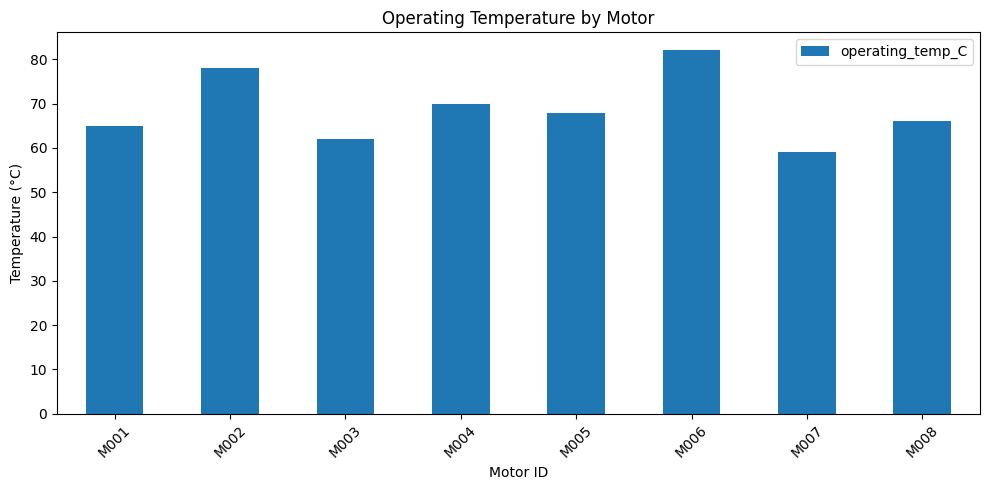

In [390]:
# Basic plotting - visualize operating temperature by motor
motors_plot = motors.reset_index()
motors_plot.plot(x="motor_id", y="operating_temp_C", kind="bar", title="Operating Temperature by Motor", figsize=(10, 5))
plt.ylabel("Temperature (°C)")
plt.xlabel("Motor ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Combining DataFrames

Often you need to combine data from multiple sources:
- **Concatenation**: Stack DataFrames vertically or horizontally (`.concat()`)
- **Merging**: Join DataFrames like SQL (`.merge()`)

### Common Merge Types:
- **Inner**: Only matching keys (default)
- **Outer**: All keys from both
- **Left**: All keys from left, matching from right
- **Right**: All keys from right, matching from left

In [391]:
# Load tensile test results - we'll use these as two batches
all_tests = pd.read_csv(DATA_DIR / "tensile_test_results.csv")

# Split into two batches for demonstration
batch_1 = all_tests[all_tests["technician"] == "Johnson"].reset_index(drop=True)
batch_2 = all_tests[all_tests["technician"] == "Martinez"].reset_index(drop=True)

print("Batch 1 (Johnson):")
print(batch_1[["specimen_id", "material_id", "ultimate_strength_MPa"]])
print("\nBatch 2 (Martinez):")
print(batch_2[["specimen_id", "material_id", "ultimate_strength_MPa"]])

Batch 1 (Johnson):
  specimen_id material_id  ultimate_strength_MPa
0        S001      MAT001                    628
1        S002      MAT001                    622
2        S007      MAT003                    508
3        S010      MAT004                    948

Batch 2 (Martinez):
  specimen_id material_id  ultimate_strength_MPa
0        S003      MAT001                    631
1        S004      MAT002                    312
2        S008      MAT003                    512


In [392]:
# Concatenate vertically (stack rows) - combine all specimens
all_specimens = pd.concat([batch_1, batch_2], ignore_index=True)
print("All specimens combined:")
print(all_specimens[["specimen_id", "technician", "ultimate_strength_MPa"]])

All specimens combined:
  specimen_id technician  ultimate_strength_MPa
0        S001    Johnson                    628
1        S002    Johnson                    622
2        S007    Johnson                    508
3        S010    Johnson                    948
4        S003   Martinez                    631
5        S004   Martinez                    312
6        S008   Martinez                    512


In [393]:
# Concatenate horizontally (side by side)
specimen_ids = pd.DataFrame({"specimen": ["S1", "S2"], "material": ["steel", "aluminum"]})
specimen_props = pd.DataFrame({"specimen": ["S1", "S2"], "density": [7850, 2700]})

combined = pd.concat([specimen_ids, specimen_props[["density"]]], axis="columns")
print("Combined columns:")
print(combined)

Combined columns:
  specimen  material  density
0       S1     steel     7850
1       S2  aluminum     2700


In [394]:
# Merging example: combine test results with material properties
test_results = pd.read_csv(DATA_DIR / "tensile_test_results.csv")
material_info = pd.read_csv(DATA_DIR / "material_properties.csv")

print("Test results:")
print(test_results[["specimen_id", "material_id", "ultimate_strength_MPa", "test_passed"]].head())
print("\nMaterial info:")
print(material_info[["material_id", "material_name", "density_kg_m3"]].head())

Test results:
  specimen_id material_id  ultimate_strength_MPa  test_passed
0        S001      MAT001                    628         True
1        S002      MAT001                    622         True
2        S003      MAT001                    631         True
3        S004      MAT002                    312         True
4        S005      MAT002                    308         True

Material info:
  material_id        material_name  density_kg_m3
0      MAT001      Steel AISI 1045           7850
1      MAT002     Aluminum 6061-T6           2700
2      MAT003  Stainless Steel 304           8000
3      MAT004   Titanium Ti-6Al-4V           4430
4      MAT005         Brass C36000           8500


In [395]:
# Inner merge (default) - only matching material_ids
inner_merged = pd.merge(test_results, material_info, on="material_id")
print("Inner merge (only matching):")
# Note: Columns with same names get _x (from left) and _y (from right) suffixes
print(inner_merged[["specimen_id", "material_name", "ultimate_strength_MPa_x", "density_kg_m3"]].head())

Inner merge (only matching):
  specimen_id     material_name  ultimate_strength_MPa_x  density_kg_m3
0        S001   Steel AISI 1045                      628           7850
1        S002   Steel AISI 1045                      622           7850
2        S003   Steel AISI 1045                      631           7850
3        S004  Aluminum 6061-T6                      312           2700
4        S005  Aluminum 6061-T6                      308           2700


In [396]:
# Left merge - all test results, matching material info
left_merged = pd.merge(test_results, material_info, on="material_id", how="left")
print("Left merge (all test results, matched material info):")
print(left_merged[["specimen_id", "material_name", "ultimate_strength_MPa_x"]].head())

Left merge (all test results, matched material info):
  specimen_id     material_name  ultimate_strength_MPa_x
0        S001   Steel AISI 1045                      628
1        S002   Steel AISI 1045                      622
2        S003   Steel AISI 1045                      631
3        S004  Aluminum 6061-T6                      312
4        S005  Aluminum 6061-T6                      308


In [397]:
# Outer merge - all materials and test results
outer_merged = pd.merge(test_results, material_info, on="material_id", how="outer")
print("Outer merge (all materials and test results):")
print(f"Total rows: {len(outer_merged)} (tests: {len(test_results)}, materials: {len(material_info)})")
print("\nSample rows:")
print(outer_merged[["specimen_id", "material_name", "ultimate_strength_MPa_x"]].head(8))

Outer merge (all materials and test results):
Total rows: 14 (tests: 10, materials: 8)

Sample rows:
  specimen_id        material_name  ultimate_strength_MPa_x
0        S001      Steel AISI 1045                    628.0
1        S002      Steel AISI 1045                    622.0
2        S003      Steel AISI 1045                    631.0
3        S004     Aluminum 6061-T6                    312.0
4        S005     Aluminum 6061-T6                    308.0
5        S006     Aluminum 6061-T6                    305.0
6        S007  Stainless Steel 304                    508.0
7        S008  Stainless Steel 304                    512.0


## 7. GroupBy Operations

**GroupBy** is one of Pandas' most powerful features. It implements the **split-apply-combine** pattern:
1. **Split**: Divide data into groups based on criteria
2. **Apply**: Apply a function to each group independently
3. **Combine**: Merge results back together

Common use cases:
- Aggregating metrics by category
- Calculating statistics per group
- Comparing performance across different configurations

In [398]:
# Load vibration measurements by machine type
vibration_data = pd.read_csv(DATA_DIR / "vibration_measurements.csv")
print("Vibration measurement data:")
vibration_data.head()

Vibration measurement data:


,measurement_id,machine_type,machine_id,vibration_mm_s,frequency_Hz,amplitude_mm,bearing_temp_C,condition,measurement_date
0,V001,Lathe,L01,2.1,60,0.035,45,Good,2024-01-15
1,V002,Lathe,L02,1.9,58,0.032,42,Good,2024-01-15
2,V003,Lathe,L03,3.8,62,0.063,58,Acceptable,2024-01-15
3,V004,Mill,M01,3.2,120,0.027,52,Acceptable,2024-01-15
4,V005,Mill,M02,2.8,118,0.024,48,Good,2024-01-15


In [399]:
# Group by machine type and calculate mean vibration
print("Average vibration by machine type:")
avg_vibration = vibration_data.groupby("machine_type")["vibration_mm_s"].mean()
print(avg_vibration)

Average vibration by machine type:
machine_type
Grinder    3.500
Lathe      2.380
Mill       3.375
Name: vibration_mm_s, dtype: float64


In [400]:
# Multiple aggregations
print("Vibration statistics by machine type:")
vib_stats = vibration_data.groupby("machine_type")["vibration_mm_s"].agg(["count", "mean", "min", "max"])
print(vib_stats)

Vibration statistics by machine type:
              count   mean  min  max
machine_type                        
Grinder           3  3.500  2.5  4.1
Lathe             5  2.380  1.9  3.8
Mill              4  3.375  2.8  4.5


In [401]:
# Group by and count occurrences
print("Measurement count by condition:")
print(vibration_data.groupby("condition").size())

Measurement count by condition:
condition
Acceptable    2
Good          7
Poor          3
dtype: int64


In [402]:
# Group by multiple columns
print("Count by machine type and condition:")
print(vibration_data.groupby(["machine_type", "condition"]).size())

Count by machine type and condition:
machine_type  condition 
Grinder       Good          1
              Poor          2
Lathe         Acceptable    1
              Good          4
Mill          Acceptable    1
              Good          2
              Poor          1
dtype: int64


In [403]:
# Load machining performance data for more complex groupby analysis
machining_runs = pd.read_csv(DATA_DIR / "machining_data_raw.csv")
print("Machining runs data:")
machining_runs.head()

Machining runs data:


,run_id,machine_id,material,tool_type,cutting_speed_m_min,feed_rate_mm_rev,depth_of_cut_mm,surface_finish_ra,tool_wear_mm,cycle_time_sec,operator,temperature_C
0,R001,CNC01,Steel,Carbide,120,0.15,2.0,1.2,0.12,45,Smith,22.5
1,R002,CNC01,Aluminum,Carbide,250,0.20,2.5,0.8,0.08,38,Smith,23.1
2,R003,CNC02,steel,HSS,80,0.12,1.5,1.8,0.15,52,Johnson,24.2
3,R004,CNC02,Aluminum,HSS,200,0.18,2.0,1.0,0.10,41,Johnson,NaN
4,R005,CNC03,Steel,Ceramic,180,0.14,2.2,1.0,0.09,42,Chen,25.8


In [404]:
# Group by material and tool type - complex aggregation
summary = machining_runs.groupby(["material", "tool_type"]).agg({
    "cutting_speed_m_min": ["mean", "min", "max"],
    "surface_finish_ra": "mean",
    "cycle_time_sec": "mean"
})
print("Machining performance summary:")
print(summary)

Machining performance summary:
                   cutting_speed_m_min           surface_finish_ra  \
                                  mean  min  max              mean   
material tool_type                                                   
 Steel   Ceramic            178.000000  175  181          1.000000   
 Steel   HSS                 88.000000   88   88          1.600000   
Aluminum Carbide            251.300000  240  258          0.811111   
         Ceramic            295.125000  290  299          0.828571   
         HSS                202.600000  198  208          1.066667   
Steel    Carbide            142.181818  115  350          1.309091   
         Ceramic            177.714286  172  182          1.071429   
         HSS                 80.857143   75   86          1.871429   
aluminum Carbide            245.000000  242  248          0.950000   
         Ceramic            301.000000  300  302          0.650000   
steel    Ceramic            178.000000  178  178          1

In [405]:
# Find best surface finish per material
best_finish = machining_runs.loc[machining_runs.groupby("material")["surface_finish_ra"].idxmin()]
print("Best surface finish per material:")
print(best_finish[["material", "tool_type", "surface_finish_ra", "cutting_speed_m_min"]])

Best surface finish per material:
    material tool_type  surface_finish_ra  cutting_speed_m_min
47     Steel   Ceramic                0.9                  181
27    Steel        HSS                1.6                   88
32  Aluminum   Carbide                0.7                  258
23     Steel   Ceramic                0.9                  182
24  aluminum   Ceramic                0.6                  302
16     steel   Ceramic                1.2                  178


## 8. Reading and Writing Data

Pandas can read/write data in many formats:
- **CSV**: Most common, human-readable
- **Excel**: For working with spreadsheets
- **JSON**: For API data and configuration files

### Best Practices:
- Always use `.head()` after reading to inspect data
- Check data types with `.dtypes`
- Use `index=False` when writing CSVs (usually)

In [406]:
# Create sample bearing test data to demonstrate saving
bearing_tests = pd.DataFrame({
    "bearing_id": [1, 2, 3, 4, 5],
    "load_kN": [12.5, 15.2, 10.8, 14.1, 11.9],
    "rotational_speed_rpm": [1500, 1800, 1200, 1650, 1400],
    "temperature_C": [65.2, 72.8, 58.3, 68.9, 62.1],
    "test_result": ["pass", "pass", "pass", "fail", "pass"]
})
print("Sample bearing test data to save:")
bearing_tests

Sample bearing test data to save:


,bearing_id,load_kN,rotational_speed_rpm,temperature_C,test_result
0,1,12.5,1500,65.2,pass
1,2,15.2,1800,72.8,pass
2,3,10.8,1200,58.3,pass
3,4,14.1,1650,68.9,fail
4,5,11.9,1400,62.1,pass


In [407]:
# Write to CSV in the temp directory
output_csv = TEMP_DIR / "bearing_test_results.csv"
bearing_tests.to_csv(output_csv, index=False)
print(f"Saved to {output_csv}")

Saved to ../data/temp/bearing_test_results.csv


In [408]:
# Read from CSV
loaded_data = pd.read_csv(output_csv)
print("Loaded data from CSV:")
print(loaded_data.head())
print("\nData types:")
print(loaded_data.dtypes)

Loaded data from CSV:
   bearing_id  load_kN  rotational_speed_rpm  temperature_C test_result
0           1     12.5                  1500           65.2        pass
1           2     15.2                  1800           72.8        pass
2           3     10.8                  1200           58.3        pass
3           4     14.1                  1650           68.9        fail
4           5     11.9                  1400           62.1        pass

Data types:
bearing_id                int64
load_kN                 float64
rotational_speed_rpm      int64
temperature_C           float64
test_result              object
dtype: object


In [409]:
# Read CSV with specific parameters
loaded_data = pd.read_csv(
    output_csv,
    dtype={"bearing_id": int},  # Specify data types
    na_values=["NA", "null"]  # Additional NaN indicators
)
print("Data types after parsing:")
print(loaded_data.dtypes)

Data types after parsing:
bearing_id                int64
load_kN                 float64
rotational_speed_rpm      int64
temperature_C           float64
test_result              object
dtype: object


In [410]:
# Write to JSON (common for equipment configuration files)
output_json = TEMP_DIR / "bearing_test_results.json"
bearing_tests.to_json(output_json, orient="records", indent=2)
print(f"Saved to {output_json}")

Saved to ../data/temp/bearing_test_results.json


In [411]:
# Read from JSON
loaded_json = pd.read_json(output_json)
print("Loaded from JSON:")
print(loaded_json.head())

Loaded from JSON:
   bearing_id  load_kN  rotational_speed_rpm  temperature_C test_result
0           1     12.5                  1500           65.2        pass
1           2     15.2                  1800           72.8        pass
2           3     10.8                  1200           58.3        pass
3           4     14.1                  1650           68.9        fail
4           5     11.9                  1400           62.1        pass


In [412]:
# Write to Excel (requires openpyxl)
# test_results.to_excel("test_results.xlsx", sheet_name="Results", index=False)
# print("Saved to test_results.xlsx")

# Read from Excel
# loaded_excel = pd.read_excel("test_results.xlsx", sheet_name="Results")
# print(loaded_excel.head())

print("Note: Excel operations commented out - requires openpyxl package")
print("Install with: pip install openpyxl")

Note: Excel operations commented out - requires openpyxl package
Install with: pip install openpyxl


In [413]:
# Common CSV parameters examples
print("Common CSV reading parameters:\n")
print("""
pd.read_csv(
    "file.csv",
    sep=",",              # Delimiter (default is comma)
    header=0,             # Row to use as column names (default is 0)
    names=["col1", "col2"],  # Custom column names
    index_col="id",       # Column to use as index
    parse_dates=["date"], # Columns to parse as dates
    na_values=["NA", "null"],  # Additional strings to recognize as NaN
    dtype={"col1": int},  # Specify data types
    nrows=1000            # Read only first 1000 rows
)
""")

# Demonstrate loading with date parsing
sensor_data_with_dates = pd.read_csv(
    DATA_DIR / "sensor_readings.csv",
    parse_dates=["timestamp"]
)
print("Example: Loading sensor data with parsed timestamps:")
print(sensor_data_with_dates.head(3))
print(f"\nTimestamp column type: {sensor_data_with_dates['timestamp'].dtype}")

Common CSV reading parameters:


pd.read_csv(
    "file.csv",
    sep=",",              # Delimiter (default is comma)
    header=0,             # Row to use as column names (default is 0)
    names=["col1", "col2"],  # Custom column names
    index_col="id",       # Column to use as index
    parse_dates=["date"], # Columns to parse as dates
    na_values=["NA", "null"],  # Additional strings to recognize as NaN
    dtype={"col1": int},  # Specify data types
    nrows=1000            # Read only first 1000 rows
)

Example: Loading sensor data with parsed timestamps:
            timestamp sensor_id  temperature_C  pressure_kPa  humidity_percent
0 2024-01-15 08:00:00       T01           22.5        1013.2                65
1 2024-01-15 09:00:00       T01           23.1        1012.8                68
2 2024-01-15 10:00:00       T01           23.8        1012.5                70

Timestamp column type: datetime64[ns]
